<a href="https://colab.research.google.com/github/darkginka/Data-Analyst/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/application_data.csv")

In [ ]:
df.shape

(307511, 122)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      

In [ ]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
#Filter data
df['NAME_CONTRACT_TYPE']=="Cash loans"
# df[df['NAME_CONTRACT_TYPE']=="Cash loans"].head()

0          True
1          True
2         False
3          True
4          True
          ...  
307506     True
307507     True
307508     True
307509     True
307510     True
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: bool

In [ ]:
# If axis is not defined then It is along rows i.e. axis = 0
# df.dropna(inplace = True)
  
# if axis is equal to 1 i.e Column
# df.dropna(axis = 1, inplace = True)

In [ ]:
#unique values
# df['NAME_CONTRACT_TYPE'].unique()
df['WEEKDAY_APPR_PROCESS_START'].unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

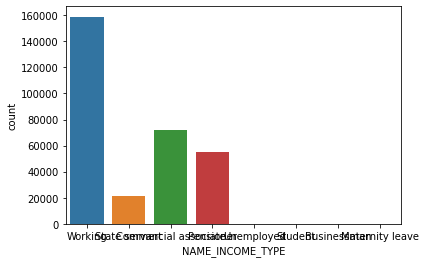

In [ ]:
#Plot the unique values
sns.countplot(df['NAME_INCOME_TYPE'])

In [ ]:
columns_to_drop=[]
#drop the column who is less corr
for i in range(2,22):
    columns_to_drop.append("FLAG_DOCUMENT_"+str(i))

In [ ]:
#drop column who have less information
col=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI','EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3',]

for i in col:
    columns_to_drop.append(i)

In [ ]:
df=df.drop(columns_to_drop,axis=1)

In [ ]:
#Find null values
df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [ ]:
high_null_value_col=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in high_null_value_col:
    df=df.drop(i,axis=1)

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0


In [ ]:
#drop column contains string object to determine which is correalted o eacch other
df_str = df.select_dtypes(include=['object'])
df=df.drop(df_str.columns,axis=1)

In [ ]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,1,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0.1118,0.2898,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0.0000,0.0214,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,1,1,0.0000,0.7970,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,1,1,0,NaN,0.0086,0.0,0.0,0.0,0.0,-322.0


In [ ]:
# value function will be applied on every column
# df= df.fillna(value = df.mean(), inplace = True)
#filling value of one column
# df["AMT_INCOME_TOTAL"].fillna(0, inplace = True)
# df['AMT_INCOME_TOTAL'].fillna(value = df['AMT_INCOME_TOTAL'].mean(),inplace = True)
 
# #value function will be applied on every row
# df.loc[df.AMT_INCOME_TOTAL == "", 'AMT_INCOME_TOTAL'] =0

# # modify value in column AMT_ANNUITY where AMT_ANNUITY is 0
# df.loc[df.AMT_ANNUITY == 0, 'AMT_ANNUITY'] =df['AMT_ANNUITY'].mean()

                                                                 OR                                                                 

In [ ]:
#Replace null values
# df.replace(np.nan,'0',inplace = True)
# #Check the changes now
# df.isnull().sum()

In [ ]:
df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,1,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0.1118,0.2898,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0.0000,0.0214,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,1,1,0.0000,0.7970,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,1,1,0,NaN,0.0086,0.0,0.0,0.0,0.0,-322.0


In [ ]:
df.groupby(['AMT_INCOME_TOTAL']).max()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,,,,,,,,,,,,,,,,,,,,,
25650.0,124157,1,0,2173500.0,48118.5,2173500.0,0.035792,-17813,365243,-1669.0,...,0,0,0,NaN,0.0403,2.0,1.0,2.0,0.0,0.0
26100.0,384810,0,0,173092.5,12438.0,157500.0,0.022800,-20904,365243,-4469.0,...,0,0,0,NaN,NaN,3.0,0.0,3.0,0.0,-557.0
26460.0,253920,0,0,101880.0,6763.5,90000.0,0.018209,-20695,365243,-12907.0,...,0,0,0,0.0267,0.0141,0.0,0.0,0.0,0.0,-271.0
26550.0,404212,0,2,571500.0,16281.0,571500.0,0.007120,-15260,365243,-1057.0,...,0,0,0,NaN,NaN,5.0,0.0,5.0,0.0,-418.0
27000.0,452627,1,2,900000.0,32337.0,900000.0,0.035792,-8873,365243,-257.0,...,1,1,1,0.0724,0.2423,9.0,2.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750000.0,252084,0,0,790830.0,52978.5,675000.0,0.009549,-19341,-443,-7414.0,...,0,1,1,NaN,NaN,0.0,0.0,0.0,0.0,-695.0
9000000.0,190160,0,0,1431531.0,132601.5,1377000.0,0.010147,-16425,-8476,-7276.0,...,0,0,0,NaN,NaN,1.0,0.0,1.0,0.0,-3.0
13500000.0,385674,0,0,1400503.5,130945.5,1368000.0,0.030755,-13551,-280,-3953.0,...,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,-13.0


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

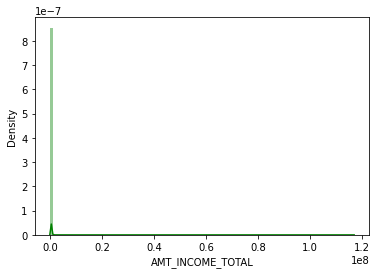

In [ ]:
plt.figure()
sns.distplot(df['AMT_INCOME_TOTAL'], color='g', bins=100, hist_kws={'alpha': 0.41})

In [ ]:
# Replace Data Types to Integer
# df["AMT_INCOME_TOTAL"] = df["AMT_INCOME_TOTAL"].astype('int')
# df["AMT_CREDIT"] = df["AMT_CREDIT"].astype('int')

# Replace Data Types to Float
# df["AMT_ANNUITY"] = df["AMT_ANNUITY"].astype('float')

# Replace Data Types to String
# df["Customer Number"] = df['Customer Number'].astype('str')

# Replace Data Types to Boolean
# df["IsPurchased"] = df['IsPurchased'].astype('bool')

# Replace Data Types to Datetime with format= '%Y%m%d'
# df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d')

In [ ]:
df_num = df.select_dtypes(include=['float','int'])
df_num

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,-815.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,NaN,NaN,2.0,0.0,2.0,0.0,-617.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,1,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0.1118,0.2898,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0.0000,0.0214,0.0,0.0,0.0,0.0,0.0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,1,1,0.0000,0.7970,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,1,1,0,NaN,0.0086,0.0,0.0,0.0,0.0,-322.0


In [ ]:
df_num_corr = df_num.corr()['AMT_INCOME_TOTAL'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) 
print("There are {} strongly correlated values with AMT_INCOME_TOTAL:\n{}".format(len(golden_features_list), golden_features_list)) 

There are 1 strongly correlated values with AMT_INCOME_TOTAL:
AMT_INCOME_TOTAL    1.0
Name: AMT_INCOME_TOTAL, dtype: float64


<AxesSubplot:>

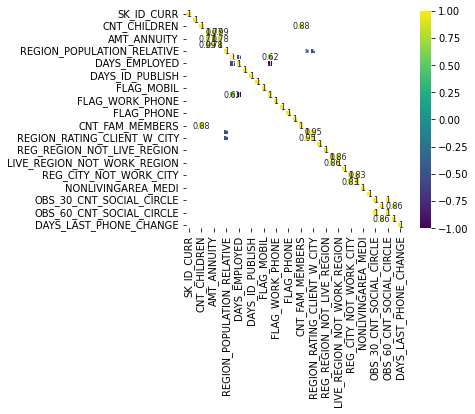

In [ ]:
corr = df_num.drop('AMT_INCOME_TOTAL', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0 ,linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)

<AxesSubplot:>

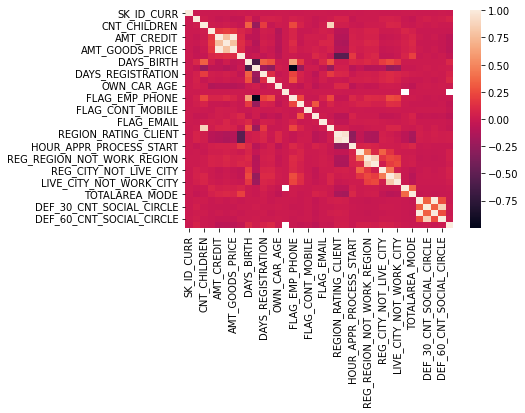

In [ ]:
# df.corr()
#Correlation plot
sns.heatmap(df.corr())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   DAYS_BIRTH                   307511 non-null  int64  
 9   DAYS_EMPLOYED                307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  OWN_CAR_AGE                  104582 non-null  float64
 13 

In [ ]:
#Extract field that can use for indexing
df2 = df[['SK_ID_CURR','TARGET']]
print(df2)

        SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]


In [ ]:
#convert all the integer to float
df_float = df.select_dtypes(include=['int'])
df = df.astype('float')

In [ ]:
#Drop the column
cd=['SK_ID_CURR','TARGET']
for j in cd:
    df=df.drop(j,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNT_CHILDREN                 307511 non-null  float64
 1   AMT_INCOME_TOTAL             307511 non-null  float64
 2   AMT_CREDIT                   307511 non-null  float64
 3   AMT_ANNUITY                  307499 non-null  float64
 4   AMT_GOODS_PRICE              307233 non-null  float64
 5   REGION_POPULATION_RELATIVE   307511 non-null  float64
 6   DAYS_BIRTH                   307511 non-null  float64
 7   DAYS_EMPLOYED                307511 non-null  float64
 8   DAYS_REGISTRATION            307511 non-null  float64
 9   DAYS_ID_PUBLISH              307511 non-null  float64
 10  OWN_CAR_AGE                  104582 non-null  float64
 11  FLAG_MOBIL                   307511 non-null  float64
 12  FLAG_EMP_PHONE               307511 non-null  float64
 13 

In [ ]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
fa = FactorAnalyzer(rotation=None)

In [ ]:
# df=df.dropna()

In [ ]:
fa.fit(df)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [ ]:
fa.get_eigenvalues()

(array([3.65076547e+00, 3.14523700e+00, 2.52979528e+00, 2.36633623e+00,
        2.11091286e+00, 1.59550749e+00, 1.42757592e+00, 1.34698279e+00,
        1.32077203e+00, 1.24836247e+00, 1.22953299e+00, 1.02654160e+00,
        1.00587313e+00, 9.99684353e-01, 9.86596847e-01, 9.59128703e-01,
        9.29954611e-01, 8.67246679e-01, 8.59368893e-01, 7.89233447e-01,
        6.58683102e-01, 6.31033331e-01, 6.10534246e-01, 5.57142334e-01,
        4.10636994e-01, 2.84365240e-01, 1.35947122e-01, 1.15882841e-01,
        8.67631121e-02, 5.07190075e-02, 4.83371047e-02, 1.28126733e-02,
        1.50528884e-03, 2.28802439e-04]),
 array([ 3.10164059e+00,  2.61038566e+00,  2.11934515e+00,  1.67082343e+00,
         1.31011057e+00,  8.24217258e-01,  7.72868705e-01,  5.56065980e-01,
         3.99632322e-01,  3.15829333e-01,  3.01686442e-01,  1.27461073e-01,
         5.03479433e-02,  1.67866979e-02, -3.89055547e-05, -1.00706782e-02,
        -2.86592070e-02, -5.39110176e-02, -7.93691441e-02, -1.11405322e-01,
  

In [ ]:
fa.get_factor_variance()

(array([3.10164047, 2.61038552, 2.11934438]),
 array([0.09122472, 0.07677604, 0.06233366]),
 array([0.09122472, 0.16800076, 0.23033442]))

In [ ]:
fa.get_uniquenesses()

array([0.84804495, 0.95262556, 0.271378  , 0.42448674, 0.25872397,
       0.89029195, 0.49010524, 0.28494867, 0.90467891, 0.92560836,
       0.99506031, 0.9999962 , 0.27908606, 0.93849561, 0.9996131 ,
       0.99020111, 0.99136737, 0.8580738 , 0.82591603, 0.82027484,
       0.95996042, 0.97496899, 0.90014305, 0.91992678, 0.94557291,
       0.7794714 , 0.84986252, 0.98548718, 0.96576613, 0.24118615,
       0.70442151, 0.23692301, 0.76584162, 0.99012117])

In [ ]:
loadings=fa.loadings_

In [ ]:
pd.DataFrame.from_records(loadings)

,0,1,2
0,0.343766,-0.177432,0.047939
1,0.132850,0.171810,0.014369
2,0.335339,0.762402,0.186848
3,0.352290,0.655948,0.145388
4,0.338059,0.769503,0.186703
5,0.097071,0.315798,-0.023598
6,0.629742,-0.336602,0.004317
7,-0.803644,0.262952,-0.007962
8,0.268148,-0.150888,0.025505
9,0.246645,-0.115426,-0.015317
